<a href="https://colab.research.google.com/github/wendy0705/Youbike-Analysis/blob/main/Youbike_Analysis_with_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Youbike_data.csv to Youbike_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Youbike_data.csv']), encoding='Big5')
df

,station,date,time,rent_value,holidays,return_value,quan,mrt,park,school,elementary,junior,senior,university,lack
0,<U+7460>公公園,2021-11-02,00:00,5,0,1,20,1,1,0,0,0,0,0,0
1,<U+7460>公公園,2021-11-02,02:00,3,0,0,20,1,1,0,0,0,0,0,0
2,<U+7460>公公園,2021-11-02,04:00,3,0,0,20,1,1,0,0,0,0,0,0
3,<U+7460>公公園,2021-11-02,06:00,3,0,1,20,1,1,0,0,0,0,0,0
4,<U+7460>公公園,2021-11-02,08:00,4,0,6,20,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,羅斯福路三段311號前,2021-11-30,14:00,13,0,15,11,0,0,0,0,0,0,0,0
27229,羅斯福路三段311號前,2021-11-30,16:00,12,0,8,11,0,0,0,0,0,0,0,0
27230,羅斯福路三段311號前,2021-11-30,18:00,17,0,25,11,0,0,0,0,0,0,0,0
27231,羅斯福路三段311號前,2021-11-30,20:00,15,0,13,11,0,0,0,0,0,0,0,0


In [4]:
df["lack"].value_counts()

0    26694
1      539
Name: lack, dtype: int64

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y = df["lack"]
X = df.drop(columns = ["lack","rent_value","return_value","quan","date","station","school"])

In [6]:
# One-hot encode the "station" and "time" columns
transformer = ColumnTransformer(
    transformers=[
        ("cat_transformer", OneHotEncoder(sparse=False, drop="first"), ["time"])
    ],
    remainder="passthrough",
)
X_transformed = transformer.fit_transform(X)

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=48
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(
               penalty = None, 
               solver = "newton-cholesky")
_ = estimator.fit(X_train, y_train)

In [8]:
y_prob_train = estimator.predict_proba(X_train)
y_prob_test = estimator.predict_proba(X_test)

In [9]:
from sklearn.metrics import roc_auc_score
print("AUC on Training Set: %.3f" %
      roc_auc_score(y_train, y_prob_train[:,1])) 
print("AUC on Test Set: %.3f" %
      roc_auc_score(y_test, y_prob_test[:,1])) 

AUC on Training Set: 0.758
AUC on Test Set: 0.763


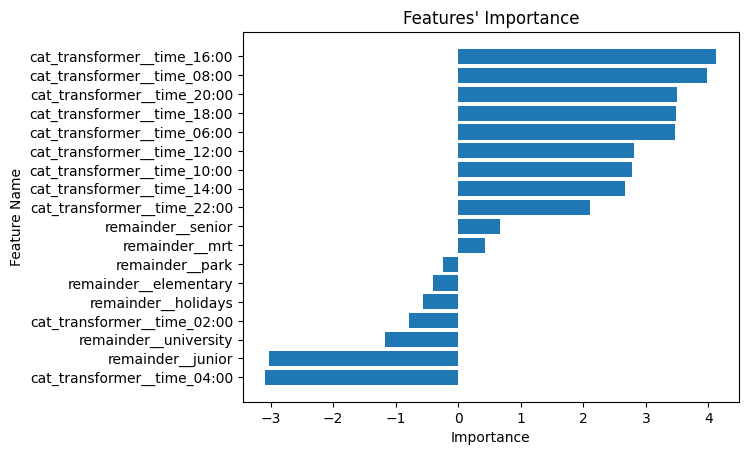

In [10]:
importance = estimator.coef_[0]
# Get the indices of the top 10 features
top10_idx = np.argsort(importance)[-20:]
# Get the feature names
feature_names = transformer.get_feature_names_out()
# Map the indices to feature names
top10_names = [feature_names[idx] for idx in top10_idx]
# Get the importances of the top 10 features
top10_importance = importance[top10_idx]

# Plot the bar chart
plt.barh(top10_names, top10_importance)
plt.title("Features' Importance")
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show()
